In [1]:
import re
from collections import defaultdict, Counter
from tqdm import trange, tqdm
import time
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# Show dataset properties

Counter({'update_secrets': 2234, 'delete_secrets': 1682, 'create_pods': 1020, 'update_customresourcedefinitions': 902, 'patch_nodes': 840, 'patch_pods': 756, 'update_services': 660, 'update_deployments': 564, 'update_endpointslices': 522, 'delete_endpoints': 458, 'delete_volumeattachments': 450, 'create_secrets': 382, 'create_serviceaccounts': 326, 'delete_pods': 312, 'update_replicasets': 308, 'update_prometheuses': 276, 'create_endpoints': 234, 'delete_services': 234, 'create_services': 232, 'create_endpointslices': 232, 'delete_endpointslices': 232, 'create_configmaps': 180, 'update_endpoints': 174, 'delete_configmaps': 170, 'delete_serviceaccounts': 156, 'update_serviceaccounts': 152, 'create_customresourcedefinitions': 134, 'update_configmaps': 122, 'update_statefulsets': 118, 'delete_clusterroles': 116, 'delete_clusterrolebindings': 110, 'delete_deployments': 110, 'create_deployments': 108, 'create_replicasets': 108, 'delete_replicasets': 108, 'create_clusterroles': 106, 'create_

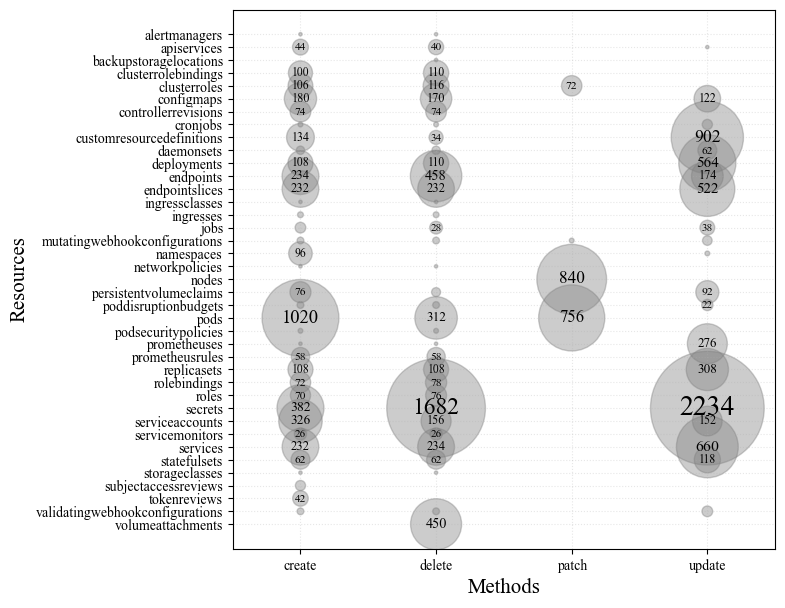

In [5]:

filename = "events-dataset.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_words = raw_text.replace('\n', ',').split(',')[:-1]

def label_wrap(labels):
    work_labels = copy.deepcopy(labels)
    for i, label in enumerate(work_labels):
        work_labels[i] = "\n".join(textwrap.wrap(label,width=15))
    return work_labels

words = []
event_filter = []
# Example of filtering out some unwanted events
for event in raw_words:
    if not('collection' in event):
        words.append(event)

verbs = []
resources = []

counter = Counter(words)

for word in words:
    verb, resource = word.split('_')[0], word.split('_')[1]
    verbs.append(verb)
    resources.append(resource)

# print(verbs)
# print(resources)

# verbs = verbs[:200]
# resources = resources[:200]

counter_verbs = Counter(verbs)
counter_resources = Counter(resources)

verbs_set = list(set(verbs))
resources_set = list(set(resources))

verbs_set.sort()
resources_set.sort(reverse=True)

verbs = [e for e in verbs_set for k in resources_set]
resources = [e for k in verbs_set for e in resources_set]

# color_verb = [counter[e+"_"+k] for e in verbs_set for k in resources_set]
area_resource = [3*counter[verbs[i]+"_"+resources[i]] for i in range(len(verbs))]
texts = [counter[verbs[i]+"_"+resources[i]] for i in range(len(verbs))]


    
# color_verb = [sum([counter[e+"_"+k] for e in verbs_set]) for k in resources_set for j in verbs_set]
# area_resource = [sum([counter[e+"_"+k] for k in resources_set]) for e in verbs_set for j in resources_set]

# print(verbs)
# print(resources)

# print(color_verb)
# print(area_resource)


print(counter)


font_size = 15
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': font_size})

fig = plt.figure(figsize=(7, 7), dpi=100)

ax=fig.add_subplot(111, label="1")

# ax.scatter(verbs, resources, s=area_resource, alpha=0.5, color='gray', edgecolor='black')
ax.scatter(verbs, resources, s=area_resource, alpha=0.4, color='gray')


ax.set_xlabel("Methods", fontsize=font_size)
ax.set_xticks(verbs_set)
ax.set_xticklabels(verbs_set, fontsize=font_size-5, linespacing=1.0)
ax.xaxis.tick_bottom()
ax.set_xlim(-0.5,3.5)

ax.set_ylabel("Resources", fontsize=font_size)
ax.set_yticks(resources_set)
ax.set_yticklabels(resources_set, fontsize=font_size-5, linespacing=1.0)
ax.yaxis.tick_left()

for j in range(len(verbs)):
    if texts[j] > 20:
        plt.annotate(str(texts[j]), (verbs[j], resources[j]), ha='center', va='center', fontsize=np.interp(texts[j], [20, 2234], [8, 20]))


plt.rcParams['grid.linestyle'] = 'dotted'
plt.rcParams['grid.alpha'] = 0.3

plt.grid()
plt.show()
fig.savefig('dataset_distribution.pdf', format='pdf', bbox_inches="tight")